<a href="https://colab.research.google.com/github/maiormarso/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3/DS9_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



#1) Write a function

In [0]:
import scipy.stats as stats
import pandas as pd
import numpy as np


In [0]:
def drunk_given(drunk_prior, drunk_positive, positive_drunk):
  return(positive_drunk * drunk_prior) / drunk_positive
drunk_given(.001, 0.08, 1)

0.0125


###BAE stands for 'before anyone else'; African American vernacular
https://schneems.com/2017/06/12/bayes-is-bae/

In [0]:
one_ink = .001
false_plus = 0.08
plus_rate = 1
bae = []
for _ in range(1,1000):
  bae.append(drunk_given(one_ink,false_plus,plus_rate))
  one_ink = drunk_given(one_ink,false_plus,plus_rate)
print(bae)

[0.0125, 0.15625, 1.953125, 24.4140625, 305.17578125, 3814.697265625, 47683.7158203125, 596046.4477539062, 7450580.596923828, 93132257.46154785, 1164153218.2693481, 14551915228.366852, 181898940354.58563, 2273736754432.3203, 28421709430404.004, 355271367880050.06, 4440892098500625.5, 5.5511151231257816e+16, 6.938893903907227e+17, 8.673617379884033e+18, 1.084202172485504e+20, 1.35525271560688e+21, 1.6940658945086e+22, 2.11758236813575e+23, 2.6469779601696876e+24, 3.3087224502121092e+25, 4.135903062765136e+26, 5.169878828456421e+27, 6.462348535570526e+28, 8.077935669463157e+29, 1.0097419586828946e+31, 1.2621774483536183e+32, 1.5777218104420228e+33, 1.9721522630525286e+34, 2.4651903288156607e+35, 3.081487911019576e+36, 3.8518598887744695e+37, 4.8148248609680865e+38, 6.018531076210108e+39, 7.523163845262635e+40, 9.403954806578294e+41, 1.1754943508222867e+43, 1.4693679385278582e+44, 1.8367099231598227e+45, 2.295887403949778e+46, 2.8698592549372225e+47, 3.587324068671528e+48, 4.4841550858394

In [0]:
drunk_prior=bae
def drunk_given(drunk_prior, drunk_positive, positive_drunk):
  return(positive_drunk * drunk_prior) / drunk_positive
drunk_given(.001, 0.08, 1)

0.0125

In [0]:
one_ink = .001
false_plus = 0.08
plus_rate = 1
bae = 1
for _ in range(1,10):
  bae=drunk_given(one_ink,false_plus,plus_rate)
  one_ink = drunk_given(one_ink,false_plus,plus_rate)
  print(one_ink)
  print(bae)

0.0125
0.0125
0.15625
0.15625
1.953125
1.953125
24.4140625
24.4140625
305.17578125
305.17578125
3814.697265625
3814.697265625
47683.7158203125
47683.7158203125
596046.4477539062
596046.4477539062
7450580.596923828
7450580.596923828


In, CA, It is illegal for any person to operate a vehicle with a: BAC of 0.08% or

higher,if the person is 21 years old or older. BAC of 0.01% or higher,if the person is

under 21 years old. According to this analysis, only needs take the test 2 times.

#2) Explore scipy.stats.bayes_mvs

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
import pandas as pd
cols = [   
   'party',
   'handicapped-infants',
   'water-project',
   'budget',
   'physician-fee-freeze',
   'el-salvador-aid',
   'religious-groups',
   'anti-satellite-ban',
   'aid-to-contras',
   'mx-missile',
   'immigration',
   'synfuels',
   'education',
   'right-to-sue',
   'crime',
   'duty_free',
   'south_Africa']
df = pd.read_csv('house-votes-84.data', names=cols)
df.head(1)

--2019-10-11 05:35:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-10-11 05:35:11 (286 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty_free,south_Africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y


In [0]:
import numpy as np
import pandas as pd
df=df.replace({'?': 'NaN', 'n':0.0, 'y':1.0,'republican':1,'democrat':0})
#df=df.replace({'?':np.NaN})
df.head(8)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty_free,south_Africa
0,1,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,0,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1
5,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
6,0,0,1,0,1,1,1,0,0,0,0,0,0,NaN,1,1,1
7,1,0,1,0,1,1,1,0,0,0,0,0,0,1,1,NaN,1


In [0]:
df = df.astype(float)

In [0]:
a = df['budget'].dropna()

In [0]:
original_sample=a

In [0]:
sample_means = []
for x in range(3000):
  m =   np.random.choice(original_sample,300).mean()
  sample_means.append(m) 

In [0]:
from scipy.stats import bayes_mvs
m=bayes_mvs(original_sample)

(0, 1)

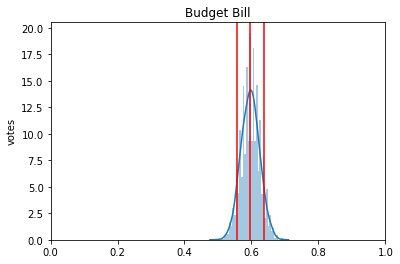

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

sns.distplot(sample_means)

plt.axvline(x=m[0][0], color='r')
plt.axvline(x=m[0][1][0], color='r')
plt.axvline(x=m[0][1][1], color='r')
plt.title('Budget Bill')
plt.ylabel('votes')

plt.xlim(0, 1)


#dem['budget'].plot.hist();

# 3)
###In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).

According to what I have read (cartoon), the blog linked in this page and and what I maior  marso, have heard said about the difference between Bayesian and Frequentist statistics, Frequentist think by what they can compute using code, whereas the Bayesian have a more open mind and are willing to go beyon the code and rationalize the issue with what they have experienced in the past.